In [9]:
#imports
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from sklearn import metrics
from custom_functions import *

In [10]:
#reading csv's
df_unsw_normal_test = pd.read_csv('cleaned_dataset/test/unsw_normal.csv')
df_bot_dos_test = pd.read_csv('cleaned_dataset/test/bot_iot_dos.csv')
df_bot_ddos_test = pd.read_csv('cleaned_dataset/test/bot_iot_ddos.csv')

In [11]:
#merging all the datasets
test = pd.concat([df_unsw_normal_test, df_bot_dos_test,df_bot_ddos_test], ignore_index=True, sort=False)

In [12]:
#preproccesing the dataset for testing, shuffles it
df,x_test,y_test = data_preprocessing_test(test)
x_test = x_test[0]
y_test = y_test[0]

In [13]:
#loading the saved model
model = tf.keras.models.load_model('my_model')

In [14]:
#getting model prediction
predictions = model.predict(x_test)

In [15]:
#selecting the classs as a prediction which has max probability
y_pred = np.argmax(predictions, axis=-1)

accuracy:   1.000
Confusion matrix, without normalization


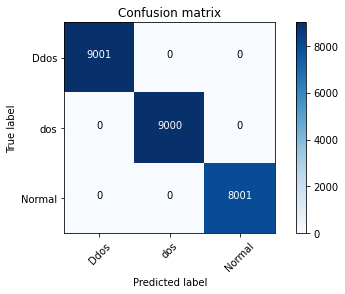

In [17]:
#plotting confustion matrix
score = metrics.accuracy_score(y_pred,y_test)
print("accuracy:   %0.3f" % score)

cm = metrics.confusion_matrix(y_pred,y_test)
plot_confusion_matrix(cm, classes=['Ddos', 'dos','Normal'])